In [454]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from datetime import time
from datetime import datetime as dt
from dateutil import parser

In [455]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000

In [456]:
df = pd.read_csv('Dallas_Half_Marathon_Results.csv', header=0)

In [457]:
df.columns

Index(['Gun_Time', 'Chip_Time', 'Bib', 'First_Name', 'Last_Name', 'Share',
       'Race_Photos', 'City', 'State', 'Division', 'Class_Position',
       'Overall_Place', 'Team', 'Age', 'Zip', 'Gen_Place', 'Total_Pace',
       'Tot_Div', 'Tot_Gend', 'Tot_AG', '5K', '5K_Pace', '10K', '10K_Pace',
       '15K', '15K_Pace', '11.5M', '11.5M_Pace', '13.1M', '13.1M_Pace'],
      dtype='object')

In [458]:
df.head(2)

,Gun_Time,Chip_Time,Bib,First_Name,Last_Name,Share,Race_Photos,City,State,Division,Class_Position,Overall_Place,Team,Age,Zip,Gen_Place,Total_Pace,Tot_Div,Tot_Gend,Tot_AG,5K,5K_Pace,10K,10K_Pace,15K,15K_Pace,11.5M,11.5M_Pace,13.1M,13.1M_Pace
0,1:06:53,1:06:53,40,Colby-Wayne,Mehmen,NaN,NaN,Princeton,TX,OVERALL,1,1,NaN,23,75407,1,5:06,6508,3140,177,15:34,4:59,31:47:00,5:06,47:35:00,5:05,59:11:00,5:07,1:06:53,5:06
1,1:10:31,1:10:31,3,Aaron,Sherf,NaN,NaN,Norman,OK,OVERALL,2,2,NaN,28,73072,2,5:23,6508,3140,365,16:38,5:20,33:32:00,5:22,50:05:00,5:21,1:02:20,5:24,1:10:31,5:23


In [459]:
#Drop Unneccesary COlumns
drop_cols = ['Bib','Share','Race_Photos','Team',
             '5K_Pace','10K_Pace','15K_Pace','11.5M_Pace','13.1M_Pace']

df = df.drop(drop_cols, axis=1)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6539 entries, 0 to 6538
Data columns (total 21 columns):
Gun_Time          6539 non-null object
Chip_Time         6539 non-null object
First_Name        6539 non-null object
Last_Name         6539 non-null object
City              6433 non-null object
State             6420 non-null object
Division          6539 non-null object
Class_Position    6539 non-null object
Overall_Place     6539 non-null object
Age               6539 non-null int64
Zip               6433 non-null object
Gen_Place         6539 non-null object
Total_Pace        6500 non-null object
Tot_Div           6539 non-null int64
Tot_Gend          6539 non-null int64
Tot_AG            6539 non-null int64
5K                6506 non-null object
10K               6504 non-null object
15K               6483 non-null object
11.5M             6067 non-null object
13.1M             6500 non-null object
dtypes: int64(4), object(17)
memory usage: 1.0+ MB


In [460]:
df.shape

(6539, 21)

In [461]:
#separate did not finish
dnf = df[df['Chip_Time']=='DNF'].index

df = df.drop(dnf, axis=0)
df.shape

(6499, 21)

## Missing Data

In [462]:
df.isna().sum()

Gun_Time            0
Chip_Time           0
First_Name          0
Last_Name           0
City              106
State             119
Division            0
Class_Position      0
Overall_Place       0
Age                 0
Zip               106
Gen_Place           0
Total_Pace          0
Tot_Div             0
Tot_Gend            0
Tot_AG              0
5K                 30
10K                22
15K                29
11.5M             442
13.1M               0
dtype: int64

In [463]:
#some values are missing state but not missing city... manually back in?
df[(df['State'].isna())&(df['City'].notna())]['City'].value_counts()

Mexico City                  4
Guatemala                    2
Mexico                       2
La Magdalena Contreras Me    1
Austin                       1
Fleury Merogis               1
San Pedro Garza Garcia       1
Frisco                       1
Name: City, dtype: int64

In [464]:
df['State'].value_counts().keys()

Index(['TX', 'OK', 'AR', 'IL', 'CA', 'CO', 'NY', 'LA', 'MO', 'KS', 'OH', 'VA',
       'FL', 'PA', 'TN', 'NJ', 'NM', 'GA', 'MN', 'MI', 'MD', 'IA', 'DC', 'WI',
       'WA', 'NC', 'MS', 'AL', 'AZ', 'MA', 'MEXICO', 'NE', 'OR', 'CDMX',
       'COAHUILA', 'KY', 'UT', 'M�X.', 'LA LIBERTA', 'AA', 'GUATEMALA', 'SC',
       'HI', 'ON', 'WY', 'DE', 'NV', 'ME', 'MEXICO CIT', 'NUEVO LEON',
       'REGI�N MET', 'COAH.', 'HEREDIA', 'PUEBLA', 'VIC', 'NL', 'NH',
       'SANTIAGO', 'TAMPS.', 'CT', 'IN', 'RJ'],
      dtype='object')

In [465]:
US_lst = ['TX', 'OK', 'AR', 'IL', 'CA', 'CO', 'NY', 'LA', 'MO', 'KS', 'OH', 
          'VA','FL', 'PA', 'TN', 'NJ', 'NM', 'GA', 'MN', 'MI', 'MD', 'IA', 
          'DC', 'WI','WA', 'NC', 'MS', 'AL', 'AZ', 'MA','NE', 'OR','KY','UT',
          'HI','WY', 'DE', 'NV', 'ME','SC','NH','CT', 'IN']
MX_lst = ['MEXICO','CDMX','COAHUILA','M�X.', 'LA LIBERTA','REGI�N MET', 
          'COAH.', 'HEREDIA', 'PUEBLA', 'VIC','SANTIAGO', 'TAMPS.','MEXICO CIT', 'NUEVO LEON','NL']
Brazil_lst = ['RJ']
Canada_lst = ['ON']
Guatemala = ['GUATEMALA']

#Should be texas ... cities are Garland and Dallas
Not_sure_lst = ['AA']

#Austin and Frisco entries are Texas
df.loc[df.City=='Austin','State']='TX'
df.loc[df.City=='Frisco','State']='TX'


In [466]:
#Clean up state names
df.loc[df['State']=='NUEVO LEON','State']='NL'
df.loc[df['State']=='NL','State']='Nuevo Leon'
df.loc[df['State']=='CDMX','State']='Mexico'
df.loc[df['State']=='M�X.','State']='Mexico'
df.loc[df['State']=='LA LIBERTA','State']='Chiapas'
df.loc[df['State']=='MEXICO CIT','State']='Mexico'
df.loc[df['State']=='TAMPS.','State']='Tamaulipas'
df.loc[df['State']=='COAH.','State']='Coahuila'
df.loc[df['State']=='MEXICO','State']='Mexico'
df.loc[df['State']=='COAHUILA','State']='Coahuila'
df.loc[df['State']=='SANTIAGO','State']='Santiago'
df.loc[df['State']=='PUEBLA','State']='Puebla'
df.loc[df['State']=='HEREDIA','State']='Heredia'
df.loc[df['State']=='VIC','State']='Victoria'
df.loc[df['City']=='Stgo','City']='Santiago'

In [467]:
#'Not Sure List'
df.loc[df.State.isin(Not_sure_lst),'State'] = 'TX'
df.loc[df.State.isin(Not_sure_lst),'Country'] = 'US'

#Mexico List
df.loc[df.State.isin(MX_lst),'Country'] = 'MX'
df.loc[df.City=='San Pedro Garza Garcia','Country'] = 'MX'
df.loc[df.City=='La Magdalena Contreras Me','Country'] = 'MX'

df.loc[df.State=='Mexico','Country'] = 'MX'
df.loc[df.State=='Coahuila','Country'] = 'MX'
df.loc[df.State=='Chiapas','Country'] = 'MX'
df.loc[df.State=='Nuevo Leon','Country'] = 'MX'
df.loc[df.State=='Tamaulipas','Country'] = 'MX'
df.loc[df.State=='Puebla','Country'] = 'MX'
df.loc[df.State=='Heredia','Country'] = 'MX'


#Handle Mexico City city list
df.loc[df.City=='Mexico City','Country'] = 'MX'

#Handle US List
df.loc[df.State.isin(US_lst),'Country'] = 'US'
df.loc[df.City=='Frisco','Country'] = 'US'
df.loc[df.City=='Austin','Country'] = 'US'

#Handle Brazil List
df.loc[df.State.isin(Brazil_lst),'Country'] = 'BR'

#Handle Canada List
df.loc[df.State.isin(Canada_lst),'Country'] = 'CAN'

#Handle Guatemala List
df.loc[df.State.isin(Guatemala),'Country'] = 'GT'
df.loc[df.City=='Guatemala','Country'] = 'GT'

#Handle France list
df.loc[df.City=='Fleury Merogis','Country'] = 'FR'

#Chile
df.loc[df['State']=='REGI�N MET','Country'] = 'CL'
df.loc[df['State']=='REGI�N MET','State'] = 'Santiago'
df.loc[df['State']=='Santiago','Country'] = 'CL'

#Costa Rica
df.loc[df['State']=='HEREDIA','Country'] = 'CR'

#Australia
df.loc[df['State']=='VIC','Country'] = 'AUS'
df.loc[df['City']=='Torquay','Country'] = 'AUS'



In [468]:
df.loc[df.City=='San Pedro Garza Garcia', 'State'] = 'Nuevo Leon'
df.loc[df.City=='Fleury Merogis', 'State'] = 'Essonne'
df.loc[df.City=='Mexico', 'State'] = 'Mexico City'
df.loc[df.City=='Mexico City', 'State'] = 'Mexico City'
df.loc[df.City=='La Magdalena Contreras Me', 'State'] = 'Mexico City'
df.loc[df.City=='Guatemala', 'State'] = 'Guatemala'
df.loc[df.State=='Mexico City', 'Country'] = 'MX'


In [469]:
df.isna().sum()

Gun_Time            0
Chip_Time           0
First_Name          0
Last_Name           0
City              106
State             106
Division            0
Class_Position      0
Overall_Place       0
Age                 0
Zip               106
Gen_Place           0
Total_Pace          0
Tot_Div             0
Tot_Gend            0
Tot_AG              0
5K                 30
10K                22
15K                29
11.5M             442
13.1M               0
Country           106
dtype: int64

In [470]:
#Fill NA
df.loc[((df.City.isna()) & (df.State.isna()) & (df.Zip.isna()) & (df.Country.isna())) ,['City','State','Zip', 'Country']] = 'Not Disclosed'


In [471]:
pd.DataFrame({'Count':df.isna().sum(), 'Percent':round(df.isna().sum()/df.shape[0],1)})

,Count,Percent
Gun_Time,0,0.0
Chip_Time,0,0.0
First_Name,0,0.0
Last_Name,0,0.0
City,0,0.0
State,0,0.0
Division,0,0.0
Class_Position,0,0.0
Overall_Place,0,0.0
Age,0,0.0


For now, I plan to drop the records with missing values for 11.5M

In [476]:
df.dropna(subset=['5K','10K','15K','11.5M'], inplace=True)

In [477]:
pd.DataFrame({'Count':df.isna().sum(), 'Percent':round(df.isna().sum()/df.shape[0],1)})

,Count,Percent
Gun_Time,0,0.0
Chip_Time,0,0.0
First_Name,0,0.0
Last_Name,0,0.0
City,0,0.0
State,0,0.0
Division,0,0.0
Class_Position,0,0.0
Overall_Place,0,0.0
Age,0,0.0


In [478]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6011 entries, 0 to 6497
Data columns (total 22 columns):
Gun_Time          6011 non-null object
Chip_Time         6011 non-null object
First_Name        6011 non-null object
Last_Name         6011 non-null object
City              6011 non-null object
State             6011 non-null object
Division          6011 non-null object
Class_Position    6011 non-null object
Overall_Place     6011 non-null object
Age               6011 non-null int64
Zip               6011 non-null object
Gen_Place         6011 non-null object
Total_Pace        6011 non-null object
Tot_Div           6011 non-null int64
Tot_Gend          6011 non-null int64
Tot_AG            6011 non-null int64
5K                6011 non-null object
10K               6011 non-null object
15K               6011 non-null object
11.5M             6011 non-null object
13.1M             6011 non-null object
Country           6011 non-null object
dtypes: int64(4), object(18)
memory usa

In [189]:
def get_sec(time_str):
    """Get Seconds from time."""
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

In [190]:
df.head()

,Gun_Time,Chip_Time,Bib,First_Name,Last_Name,Share,Race_Photos,City,State,Division,Class_Position,Overall_Place,Team,Age,Zip,Gen_Place,Total_Pace,Tot_Div,Tot_Gend,Tot_AG,5K,5K_Pace,10K,10K_Pace,15K,15K_Pace,11.5M,11.5M_Pace,13.1M,13.1M_Pace
0,1:06:53,1:06:53,40,Colby-Wayne,Mehmen,NaN,NaN,Princeton,TX,OVERALL,1,1,NaN,23,75407,1,5:06,6508,3140,177,15:34,4:59,31:47:00,5:06,47:35:00,5:05,59:11:00,5:07,1:06:53,5:06
1,1:10:31,1:10:31,3,Aaron,Sherf,NaN,NaN,Norman,OK,OVERALL,2,2,NaN,28,73072,2,5:23,6508,3140,365,16:38,5:20,33:32:00,5:22,50:05:00,5:21,1:02:20,5:24,1:10:31,5:23
2,1:12:19,1:12:19,41,Grady,Frazier,NaN,NaN,Tyler,TX,OVERALL,3,3,NaN,23,75707,3,5:31,6508,3140,177,16:41,5:21,33:52:00,5:26,50:59:00,5:27,1:03:45,5:31,1:12:19,5:31
3,1:12:29,1:12:27,13602,Alex,Beruscha,NaN,NaN,Louisville,KY,M 25-29,1,4,NaN,27,40220,4,5:32,6508,3140,365,17:11,5:30,34:31:00,5:32,51:37:00,5:31,1:04:09,5:33,1:12:27,5:32
4,1:12:55,1:12:54,47,Cody,Walker,NaN,NaN,Waxahachie,TX,M 1-19,1,5,NaN,19,75165,5,5:34,6508,3140,103,16:58,5:26,34:36:00,5:33,51:57:00,5:33,1:04:37,5:35,1:12:54,5:34


In [191]:
df['Tot_Gend']

0       3140
1       3140
2       3140
3       3140
4       3140
        ... 
6495    3368
6496    3140
6497    3368
6498    3140
6512    3368
Name: Tot_Gend, Length: 6500, dtype: int64

### Drop Several Columns

In [192]:
df['sec'] = np.NaN

for i in range(0,df.shape[0]-1):
    df['sec'][i] = get_sec(df['13.1M'][i])

/Users/stephenstark/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(array([  6.,  14.,  45., 105., 181., 291., 413., 587., 647., 607., 555.,
        536., 448., 375., 313., 272., 201., 195., 150., 124., 108.,  79.,
         81.,  42.,  35.,  38.,  18.,  13.,   6.,   4.,   2.,   1.,   2.,
          3.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 4013.  ,  4401.68,  4790.36,  5179.04,  5567.72,  5956.4 ,
         6345.08,  6733.76,  7122.44,  7511.12,  7899.8 ,  8288.48,
         8677.16,  9065.84,  9454.52,  9843.2 , 10231.88, 10620.56,
        11009.24, 11397.92, 11786.6 , 12175.28, 12563.96, 12952.64,
        13341.32, 13730.  , 14118.68, 14507.36, 14896.04, 15284.72,
        15673.4 , 16062.08, 16450.76, 16839.44, 17228.12, 17616.8 ,
        18005.48, 18394.16, 18782.84, 19171.52, 19560.2 , 19948.88,
        20337.56, 20726.24, 21114.92, 21503.6 , 21892.28, 22280.96,
        22669.64, 23058.32, 23447.  ]),
 <a list of 50 Patch objects>)

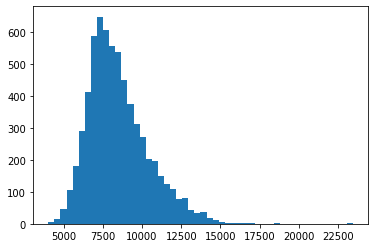

In [193]:
plt.hist(df['sec'], bins = 50)

In [194]:
drop_cols = ['Share','Race_Photos','Bib','Team', 'First_Name','Last_Name',
            'Zip', 'First_Name','Last_Name','City','State',
            'Division','Class_Position', 'Tot_Div']
time_cols = ['Gun_Time','Chip_Time','Total_Pace',
            '5K_Pace','10K_Pace','15K_Pace','11.5M_Pace',
            '13.1M_Pace', '5K','10K','15K','11.5M']

df.drop(columns=drop_cols, inplace=True)
df.drop(columns=time_cols, inplace=True)


In [195]:
df.head(5)

,Overall_Place,Age,Gen_Place,Tot_Gend,Tot_AG,13.1M,sec
0,1,23,1,3140,177,1:06:53,4013.0
1,2,28,2,3140,365,1:10:31,4231.0
2,3,23,3,3140,177,1:12:19,4339.0
3,4,27,4,3140,365,1:12:27,4347.0
4,5,19,5,3140,103,1:12:54,4374.0


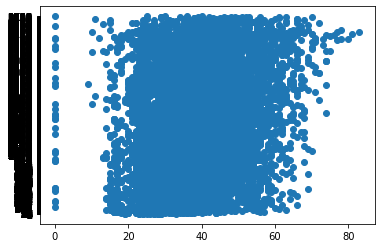

In [198]:
plt.scatter(x=df.Age, y=df.Gen_Place)
plt.show()

In [199]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(df)
x_pca = pd.DataFrame(x_pca, columns = ['PC1','PC2'])


# Plot
import matplotlib.pyplot as plt
plt.scatter(x_pca['PC1'], x_pca['PC2'], alpha=0.6)
plt.title('Scatter plot - Data (train)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#print(df_anomaly.shape) #(122916, 56)
#print(X_train.shape) #(61458, 56)
#print(X_test.shape) #(61458, 56)

ValueError: could not convert string to float: 'DQ'

## How many people did not finish?

In [9]:
DNF = df[df['Overall Place']=='DNF']
DNF.head()

,Gun Time..,Chip Time,First Name,Last Name,City,State,Division,Class Position,Overall Place,Age,Zip,Gen Place,Total Pace (/M),Tot Div,Tot Gend,Tot AG,5K,5K Pace (/M),10K,10K Pace (/M),15K,15K Pace (/M),11.5M,11.5M Pace (/M),13.1M,13.1M Pace (/M)
6499,DNF,DNF,Eileen,Reisdorf,Dallas,TX,F 35-39,INC,DNF,36,75214,INC,NaN,6508,3368,511,48:53:00,15:40,1:37:11,15:34,NaN,NaN,NaN,NaN,NaN,NaN
6500,DNF,DNF,Erica,Walsh-Leos,Dallas,TX,F 40-44,INC,DNF,40,75206,INC,NaN,6508,3368,458,58:13:00,18:40,2:00:17,19:17,NaN,NaN,NaN,NaN,NaN,NaN
6501,DNF,DNF,Jason,Hart,Plano,TX,M 40-44,INC,DNF,41,75024,INC,NaN,6508,3140,444,30:06:00,9:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6502,DNF,DNF,Alex,Rabin,Dallas,TX,F 1-19,INC,DNF,15,75205,INC,NaN,6508,3368,110,32:03:00,10:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6503,DNF,DNF,Morgan,Getman,Dallas,TX,F 20-24,INC,DNF,23,75206,INC,NaN,6508,3368,327,34:27:00,11:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
DNF.shape

(39, 26)

## Any DQs?

In [11]:
DQ = df[df['Overall Place']=='DQ']
DQ.head()

,Gun Time..,Chip Time,First Name,Last Name,City,State,Division,Class Position,Overall Place,Age,Zip,Gen Place,Total Pace (/M),Tot Div,Tot Gend,Tot AG,5K,5K Pace (/M),10K,10K Pace (/M),15K,15K Pace (/M),11.5M,11.5M Pace (/M),13.1M,13.1M Pace (/M)
6512,DNF,DNF,Scolah,Jepkoech,Allen,TX,F 0- 0,DQ,DQ,0,75002,DQ,5:37,6508,3368,19,5:05,1:38,27:01:00,4:20,47:53:00,5:07,1:03:16,5:28,1:13:32,5:37


## I want to narrow down my dataframe to only include people who finished.

In [12]:
DQ

,Gun Time..,Chip Time,First Name,Last Name,City,State,Division,Class Position,Overall Place,Age,Zip,Gen Place,Total Pace (/M),Tot Div,Tot Gend,Tot AG,5K,5K Pace (/M),10K,10K Pace (/M),15K,15K Pace (/M),11.5M,11.5M Pace (/M),13.1M,13.1M Pace (/M)
6512,DNF,DNF,Scolah,Jepkoech,Allen,TX,F 0- 0,DQ,DQ,0,75002,DQ,5:37,6508,3368,19,5:05,1:38,27:01:00,4:20,47:53:00,5:07,1:03:16,5:28,1:13:32,5:37


In [13]:
df = df[df['Overall Place']!='DNF']

In [14]:
df = df[df['Overall Place']!='DQ']

In [15]:
df.shape

(6499, 26)

In [16]:
df.head()

,Gun Time..,Chip Time,First Name,Last Name,City,State,Division,Class Position,Overall Place,Age,Zip,Gen Place,Total Pace (/M),Tot Div,Tot Gend,Tot AG,5K,5K Pace (/M),10K,10K Pace (/M),15K,15K Pace (/M),11.5M,11.5M Pace (/M),13.1M,13.1M Pace (/M)
0,1:06:53,1:06:53,Colby-Wayne,Mehmen,Princeton,TX,OVERALL,1,1,23,75407,1,5:06,6508,3140,177,15:34,4:59,31:47:00,5:06,47:35:00,5:05,59:11:00,5:07,1:06:53,5:06
1,1:10:31,1:10:31,Aaron,Sherf,Norman,OK,OVERALL,2,2,28,73072,2,5:23,6508,3140,365,16:38,5:20,33:32:00,5:22,50:05:00,5:21,1:02:20,5:24,1:10:31,5:23
2,1:12:19,1:12:19,Grady,Frazier,Tyler,TX,OVERALL,3,3,23,75707,3,5:31,6508,3140,177,16:41,5:21,33:52:00,5:26,50:59:00,5:27,1:03:45,5:31,1:12:19,5:31
3,1:12:29,1:12:27,Alex,Beruscha,Louisville,KY,M 25-29,1,4,27,40220,4,5:32,6508,3140,365,17:11,5:30,34:31:00,5:32,51:37:00,5:31,1:04:09,5:33,1:12:27,5:32
4,1:12:55,1:12:54,Cody,Walker,Waxahachie,TX,M 1-19,1,5,19,75165,5,5:34,6508,3140,103,16:58,5:26,34:36:00,5:33,51:57:00,5:33,1:04:37,5:35,1:12:54,5:34


## Are we missing any data?

In [17]:
print('# missing values \n', df.isnull().sum())

# missing values 
 Gun Time..           0
Chip Time            0
First Name           0
Last Name            0
City               106
State              119
Division             0
Class Position       0
Overall Place        0
Age                  0
Zip                106
Gen Place            0
Total Pace (/M)      0
Tot Div              0
Tot Gend             0
Tot AG               0
5K                  30
5K Pace (/M)        30
10K                 22
10K Pace (/M)       22
15K                 29
15K Pace (/M)       29
11.5M              442
11.5M Pace (/M)    442
13.1M                0
13.1M Pace (/M)      0
dtype: int64


In [18]:
df[df['5K'].isnull()]

,Gun Time..,Chip Time,First Name,Last Name,City,State,Division,Class Position,Overall Place,Age,Zip,Gen Place,Total Pace (/M),Tot Div,Tot Gend,Tot AG,5K,5K Pace (/M),10K,10K Pace (/M),15K,15K Pace (/M),11.5M,11.5M Pace (/M),13.1M,13.1M Pace (/M)
502,1:43:55,1:43:00,Nancy,Thonen,Thornton,CO,F 50-54,3,503,52,80241,102,7:52,6508,3368,218,NaN,NaN,48:55:00,7:50,1:13:15,7:50,1:31:10,7:53,1:43:00,7:52
629,1:59:52,1:45:33,Taylor,Martin,Fort Worth,TX,M 40-44,64,630,40,76109,495,8:03,6508,3140,444,NaN,NaN,49:03:00,7:52,1:14:06,7:55,1:33:00,8:03,1:45:33,8:03
661,1:47:56,1:46:07,Jason,Weimer,Murphy,TX,M 45-49,63,662,46,75094,513,8:06,6508,3140,469,NaN,NaN,50:15:00,8:03,1:15:05,8:01,1:33:32,8:05,1:46:07,8:06
750,1:54:56,1:47:48,Erica,Upham,Dallas,TX,F 30-34,29,751,30,75238,173,8:14,6508,3368,493,NaN,NaN,50:54:00,8:09,1:16:39,8:11,1:35:26,8:15,1:47:48,8:14
793,1:55:35,1:48:30,Carlie,Howard,Pearland,TX,F 20-24,32,794,23,77584,192,8:17,6508,3368,327,NaN,NaN,51:18:00,8:13,1:17:22,8:16,1:36:03,8:19,1:48:30,8:17
875,1:50:27,1:49:36,Dave,Dierkes,Dallas,TX,M 40-44,89,876,44,75214,659,8:22,6508,3140,444,NaN,NaN,53:10:00,8:31,1:18:57,8:26,1:37:22,8:25,1:49:36,8:22
1419,2:07:24,1:56:33,Max,Wheless,Dallas,TX,M 1-19,63,1420,14,75287,978,8:54,6508,3140,103,NaN,NaN,57:26:00,9:12,1:24:40,9:03,1:44:06,9:00,1:56:33,8:54
1481,1:57:15,1:57:15,Elizabeth,Langdon,Dallas,TX,F 25-29,95,1482,29,75204,469,8:57,6508,3368,567,NaN,NaN,NaN,NaN,NaN,NaN,1:44:53,9:04,1:57:15,8:57
2069,2:10:34,2:03:01,Linda,Adams,Flower Mound,TX,F 50-54,25,2070,54,75028,707,9:23,6508,3368,218,NaN,NaN,58:57:00,9:27,1:27:54,9:23,1:48:58,9:26,2:03:01,9:23
2113,2:18:17,2:03:31,Lissette,Engel,Rowlett,TX,F 55-59,25,2114,56,75088,729,9:26,6508,3368,169,NaN,NaN,57:42:00,9:15,1:26:56,9:17,1:48:41,9:24,2:03:31,9:26


In [19]:
df.dtypes

Gun Time..         object
Chip Time          object
First Name         object
Last Name          object
City               object
State              object
Division           object
Class Position     object
Overall Place      object
Age                 int64
Zip                object
Gen Place          object
Total Pace (/M)    object
Tot Div             int64
Tot Gend            int64
Tot AG              int64
5K                 object
5K Pace (/M)       object
10K                object
10K Pace (/M)      object
15K                object
15K Pace (/M)      object
11.5M              object
11.5M Pace (/M)    object
13.1M              object
13.1M Pace (/M)    object
dtype: object

## Need to start converting data types.
First, I need to have python interpret any time data as a time

In [20]:
import datetime
#datetime.datetime.strptime(A,"%H:%S")
#print(A)

In [21]:
#df['13.1M'] = df['13.1M'].apply(lambda x: datetime.datetime.strptime(x,"%H:%S"))     

#train_titanic_data['alone'] = train_titanic_data['Fam'].apply(lambda x: 1 if x==0 else 0)

df['13.1M'] = pd.to_datetime(df['13.1M'], format = '%H:%M:%S').dt.time


In [30]:
df.head()

,Gun Time..,Chip Time,First Name,Last Name,City,State,Division,Class Position,Overall Place,Age,Zip,Gen Place,Total Pace (/M),Tot Div,Tot Gend,Tot AG,5K,5K Pace (/M),10K,10K Pace (/M),15K,15K Pace (/M),11.5M,11.5M Pace (/M),13.1M,13.1M Pace (/M)
0,1:06:53,1:06:53,Colby-Wayne,Mehmen,Princeton,TX,OVERALL,1,1,23,75407,1,5:06,6508,3140,177,15:34,4:59,31:47:00,5:06,47:35:00,5:05,59:11:00,5:07,01:06:53,5:06
1,1:10:31,1:10:31,Aaron,Sherf,Norman,OK,OVERALL,2,2,28,73072,2,5:23,6508,3140,365,16:38,5:20,33:32:00,5:22,50:05:00,5:21,1:02:20,5:24,01:10:31,5:23
2,1:12:19,1:12:19,Grady,Frazier,Tyler,TX,OVERALL,3,3,23,75707,3,5:31,6508,3140,177,16:41,5:21,33:52:00,5:26,50:59:00,5:27,1:03:45,5:31,01:12:19,5:31
3,1:12:29,1:12:27,Alex,Beruscha,Louisville,KY,M 25-29,1,4,27,40220,4,5:32,6508,3140,365,17:11,5:30,34:31:00,5:32,51:37:00,5:31,1:04:09,5:33,01:12:27,5:32
4,1:12:55,1:12:54,Cody,Walker,Waxahachie,TX,M 1-19,1,5,19,75165,5,5:34,6508,3140,103,16:58,5:26,34:36:00,5:33,51:57:00,5:33,1:04:37,5:35,01:12:54,5:34


In [22]:
df.dtypes


Gun Time..         object
Chip Time          object
First Name         object
Last Name          object
City               object
State              object
Division           object
Class Position     object
Overall Place      object
Age                 int64
Zip                object
Gen Place          object
Total Pace (/M)    object
Tot Div             int64
Tot Gend            int64
Tot AG              int64
5K                 object
5K Pace (/M)       object
10K                object
10K Pace (/M)      object
15K                object
15K Pace (/M)      object
11.5M              object
11.5M Pace (/M)    object
13.1M              object
13.1M Pace (/M)    object
dtype: object

In [23]:
df.head()

,Gun Time..,Chip Time,First Name,Last Name,City,State,Division,Class Position,Overall Place,Age,Zip,Gen Place,Total Pace (/M),Tot Div,Tot Gend,Tot AG,5K,5K Pace (/M),10K,10K Pace (/M),15K,15K Pace (/M),11.5M,11.5M Pace (/M),13.1M,13.1M Pace (/M)
0,1:06:53,1:06:53,Colby-Wayne,Mehmen,Princeton,TX,OVERALL,1,1,23,75407,1,5:06,6508,3140,177,15:34,4:59,31:47:00,5:06,47:35:00,5:05,59:11:00,5:07,01:06:53,5:06
1,1:10:31,1:10:31,Aaron,Sherf,Norman,OK,OVERALL,2,2,28,73072,2,5:23,6508,3140,365,16:38,5:20,33:32:00,5:22,50:05:00,5:21,1:02:20,5:24,01:10:31,5:23
2,1:12:19,1:12:19,Grady,Frazier,Tyler,TX,OVERALL,3,3,23,75707,3,5:31,6508,3140,177,16:41,5:21,33:52:00,5:26,50:59:00,5:27,1:03:45,5:31,01:12:19,5:31
3,1:12:29,1:12:27,Alex,Beruscha,Louisville,KY,M 25-29,1,4,27,40220,4,5:32,6508,3140,365,17:11,5:30,34:31:00,5:32,51:37:00,5:31,1:04:09,5:33,01:12:27,5:32
4,1:12:55,1:12:54,Cody,Walker,Waxahachie,TX,M 1-19,1,5,19,75165,5,5:34,6508,3140,103,16:58,5:26,34:36:00,5:33,51:57:00,5:33,1:04:37,5:35,01:12:54,5:34


In [24]:
#time(df['13.1M']).datetime.time()

df['13.1M'] = pd.to_datetime(df['13.1M'],format= '%H:%M:%S', box=True).dt.time



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: the 'box' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'box'
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
df.head()

,Gun Time..,Chip Time,First Name,Last Name,City,State,Division,Class Position,Overall Place,Age,Zip,Gen Place,Total Pace (/M),Tot Div,Tot Gend,Tot AG,5K,5K Pace (/M),10K,10K Pace (/M),15K,15K Pace (/M),11.5M,11.5M Pace (/M),13.1M,13.1M Pace (/M)
0,1:06:53,1:06:53,Colby-Wayne,Mehmen,Princeton,TX,OVERALL,1,1,23,75407,1,5:06,6508,3140,177,15:34,4:59,31:47:00,5:06,47:35:00,5:05,59:11:00,5:07,01:06:53,5:06
1,1:10:31,1:10:31,Aaron,Sherf,Norman,OK,OVERALL,2,2,28,73072,2,5:23,6508,3140,365,16:38,5:20,33:32:00,5:22,50:05:00,5:21,1:02:20,5:24,01:10:31,5:23
2,1:12:19,1:12:19,Grady,Frazier,Tyler,TX,OVERALL,3,3,23,75707,3,5:31,6508,3140,177,16:41,5:21,33:52:00,5:26,50:59:00,5:27,1:03:45,5:31,01:12:19,5:31
3,1:12:29,1:12:27,Alex,Beruscha,Louisville,KY,M 25-29,1,4,27,40220,4,5:32,6508,3140,365,17:11,5:30,34:31:00,5:32,51:37:00,5:31,1:04:09,5:33,01:12:27,5:32
4,1:12:55,1:12:54,Cody,Walker,Waxahachie,TX,M 1-19,1,5,19,75165,5,5:34,6508,3140,103,16:58,5:26,34:36:00,5:33,51:57:00,5:33,1:04:37,5:35,01:12:54,5:34


## What is the data type of each column?
Which columns need to be adjusted?

In [26]:
df.dtypes

Gun Time..         object
Chip Time          object
First Name         object
Last Name          object
City               object
State              object
Division           object
Class Position     object
Overall Place      object
Age                 int64
Zip                object
Gen Place          object
Total Pace (/M)    object
Tot Div             int64
Tot Gend            int64
Tot AG              int64
5K                 object
5K Pace (/M)       object
10K                object
10K Pace (/M)      object
15K                object
15K Pace (/M)      object
11.5M              object
11.5M Pace (/M)    object
13.1M              object
13.1M Pace (/M)    object
dtype: object

## Where are we missing data?

In [27]:
df[df.City.isnull()]

,Gun Time..,Chip Time,First Name,Last Name,City,State,Division,Class Position,Overall Place,Age,Zip,Gen Place,Total Pace (/M),Tot Div,Tot Gend,Tot AG,5K,5K Pace (/M),10K,10K Pace (/M),15K,15K Pace (/M),11.5M,11.5M Pace (/M),13.1M,13.1M Pace (/M)
54,1:25:32,1:25:27,Jason,Hatfield,NaN,NaN,M 40-44,6,55,44,NaN,47,6:31,6508,3140,444,19:42,6:19,40:03:00,6:25,1:00:22,6:27,NaN,NaN,01:25:27,6:31
59,1:25:41,1:25:40,Rachel,Warner,NaN,NaN,F 30-34,2,60,30,NaN,10,6:32,6508,3368,493,20:03,6:26,40:48:00,6:32,1:01:08,6:32,1:15:49,6:34,01:25:40,6:32
67,1:26:34,1:26:31,Ashton,Prejean,NaN,NaN,M 40-44,8,68,40,NaN,56,6:36,6508,3140,444,21:08,6:46,42:08:00,6:45,1:02:22,6:40,1:16:54,6:39,01:26:31,6:36
100,1:28:49,1:28:46,Luke,Halterman,NaN,NaN,M 25-29,9,101,28,NaN,81,6:47,6508,3140,365,20:19,6:31,41:44:00,6:41,1:02:57,6:44,1:18:35,6:48,01:28:46,6:47
192,1:33:57,1:33:57,Eric,Kimball,NaN,NaN,M 40-44,23,193,41,NaN,167,7:10,6508,3140,444,22:33,7:14,44:31:00,7:08,1:06:22,7:05,1:22:58,7:11,01:33:57,7:10
200,1:34:55,1:34:37,Boniface,Ndungu,NaN,NaN,M 35-39,21,201,39,NaN,173,7:13,6508,3140,433,23:04,7:24,45:42:00,7:19,1:07:25,7:12,1:23:49,7:15,01:34:37,7:13
202,1:34:50,1:34:41,Kevin,Cree,NaN,NaN,M 30-34,24,203,34,NaN,174,7:14,6508,3140,420,21:44,6:58,43:27:00,6:58,1:07:41,7:14,1:24:07,7:17,01:34:41,7:14
427,1:42:01,1:41:13,Bruce,Topott,NaN,NaN,M 50-54,23,428,54,NaN,347,7:44,6508,3140,322,23:59,7:41,48:03:00,7:42,1:11:57,7:41,1:29:31,7:45,01:41:13,7:44
516,1:50:30,1:43:28,Oliver,Cox,NaN,NaN,M 30-34,63,517,34,NaN,413,7:54,6508,3140,420,22:17,7:09,46:50:00,7:30,1:11:44,7:40,1:30:32,7:50,01:43:28,7:54
578,2:01:17,1:44:28,Philip,Rasansky,NaN,NaN,M 20-24,38,579,22,NaN,458,7:58,6508,3140,177,26:42:00,8:33,52:32:00,8:25,1:17:07,8:14,1:33:53,8:07,01:44:28,7:58


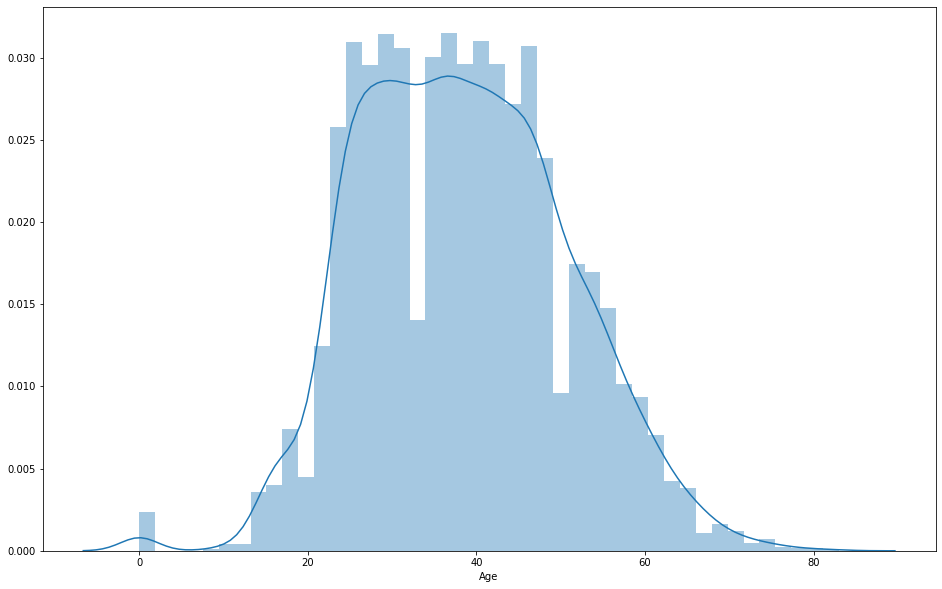

In [33]:
df.Age.plot()

%matplotlib inline
plt.figure(figsize=(16, 10))

sns.distplot(df.Age)